In [1]:
from analysing_entanglement import *
import os
import pickle 
import numpy as np
from qm_shors_algorithm import *
import Gates as gts
import shor_helpers as sh
import copy
from tim import Tim
import matplotlib.pyplot as plt
import numpy_helpers as nph



In [2]:
#pickle_element = get_pickle_element(2,85,2**13)

In [3]:
'''

#collect all N and x values calculated so far
N_values = []
x_values = []
path_to_pickles = "/space/ge65kox/BA/pickles/analysing_entanglement_wo_measurement/"
#for all files in folder
i = 0
for file in os.listdir(path_to_pickles):
    if file.endswith(".pkl"):
        #unpickle file
        pickle_in = open(path_to_pickles+file,"rb")
        pickle_element = pickle.load(pickle_in)
        #collect N and x values
        N = [pickle_element[i].N for i in range(len(pickle_element))]
        x = [pickle_element[i].x for i in range(len(pickle_element))]
        print(len(N))
        N_values += N
        x_values += x
        i += 1

#dictionary with N and x
pickle_dict = {"N":N_values,"x":x_values}
#save dictionary
pickle_out = open("/space/ge65kox/BA/pickles/"+"N_x_values.pkl","wb")
pickle.dump(pickle_dict,pickle_out)
'''



'\n\n#collect all N and x values calculated so far\nN_values = []\nx_values = []\npath_to_pickles = "/space/ge65kox/BA/pickles/analysing_entanglement_wo_measurement/"\n#for all files in folder\ni = 0\nfor file in os.listdir(path_to_pickles):\n    if file.endswith(".pkl"):\n        #unpickle file\n        pickle_in = open(path_to_pickles+file,"rb")\n        pickle_element = pickle.load(pickle_in)\n        #collect N and x values\n        N = [pickle_element[i].N for i in range(len(pickle_element))]\n        x = [pickle_element[i].x for i in range(len(pickle_element))]\n        print(len(N))\n        N_values += N\n        x_values += x\n        i += 1\n\n#dictionary with N and x\npickle_dict = {"N":N_values,"x":x_values}\n#save dictionary\npickle_out = open("/space/ge65kox/BA/pickles/"+"N_x_values.pkl","wb")\npickle.dump(pickle_dict,pickle_out)\n'

In [4]:
'''
#create on large pickle of all files
pickle_objs = []
path_to_pickles = "/space/ge65kox/BA/pickles/analysing_entanglement_wo_measurement/"
i = 0
for file in os.listdir(path_to_pickles):
    if file.endswith(".pkl"):
        pickle_in = open(path_to_pickles+file,"rb")
        pickle_element = pickle.load(pickle_in)
        pickle_objs += pickle_element
        i += 1
print(i)
pickle_out = open("/space/ge65kox/BA/pickles/"+"ana_ent_objs_wo_measurement.pkl","wb")
pickle.dump(pickle_objs,pickle_out)
'''



'\n#create on large pickle of all files\npickle_objs = []\npath_to_pickles = "/space/ge65kox/BA/pickles/analysing_entanglement_wo_measurement/"\ni = 0\nfor file in os.listdir(path_to_pickles):\n    if file.endswith(".pkl"):\n        pickle_in = open(path_to_pickles+file,"rb")\n        pickle_element = pickle.load(pickle_in)\n        pickle_objs += pickle_element\n        i += 1\nprint(i)\npickle_out = open("/space/ge65kox/BA/pickles/"+"ana_ent_objs_wo_measurement.pkl","wb")\npickle.dump(pickle_objs,pickle_out)\n'

In [5]:
x=2
N=85
print("N",N)
print("x",x)
xi=2**13
n_samples = 1000
len_a = 2*int(np.ceil(np.log2(N)))+3
cx_mpos = gts.cx_pow_2k_mod_N_mpo_from_fatU(N,x,len_a,xi)

mps,len_a,tim_before_fourier = get_shor_mpo(N,x,xi,cx_mpos)
#mps , len_a, tim_before_fourier = get_shor_fat(N,x,xi)

schmidt_values_mpo = cx_mpos[0].get_schmidt_values_all_sites()

schmidt_values_before_fourier_mpo = mps.get_schmidt_values_all_sites()
print(mps.maximum_bond_dim(),"Maximum bond dimension before fourier and before measurement")
entanglement_entropy_before_fourier_mpo = mps.get_entanglement_all_sites()

circmps_mpo = mps
mpomps = copy.deepcopy(circmps_mpo)

tim_measurement = tim.Tim()
measurement_mps = circmps_mpo.collapse_subspace(len_a,circmps_mpo.L)

print(measurement_mps.maximum_bond_dim(),"Maximum bond dimension after collapse U")
schmidt_values_measurement_before_fourier_mpo = measurement_mps.get_schmidt_values_all_sites()
entanglement_entropy_measurement_before_fourier_mpo = measurement_mps.get_entanglement_all_sites()
tim_measurement.print_since_last("collapse U")


N 85
x 2
cx_gate (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2)
MPS initialized in 0.0011038780212402344
MPO applied in 0.008888721466064453
SWAP gates applied in 0.005663633346557617
MPO applied in 0.009198188781738281
SWAP gates applied in 0.0051422119140625
MPO applied in 0.009143352508544922
SWAP gates applied in 0.004872798919677734
MPO applied in 0.009069681167602539
SWAP gates applied in 0.004512310028076172
MPO applied in 0.008867502212524414
SWAP gates applied in 0.004250526428222656
MPO applied in 0.006319761276245117
SWAP gates applied in 0.001996755599975586
MPO applied in 0.0069828033447265625
SWAP gates applied in 0.0025255680084228516
MPO applied in 0.0068721771240234375
SWAP gates applied in 0.002240419387817383
MPO applied in 0.006963968276977539
SWAP gates applied in 0.0019791126251220703
MPO applied in 0.006866931915283203
SWAP gates applied in 0.001979351043701172
MPO applied in 0.005327463150024414
SWAP gates applied in 0.0009951591491699219
MPO applied in 0.0045

0.00545501708984375

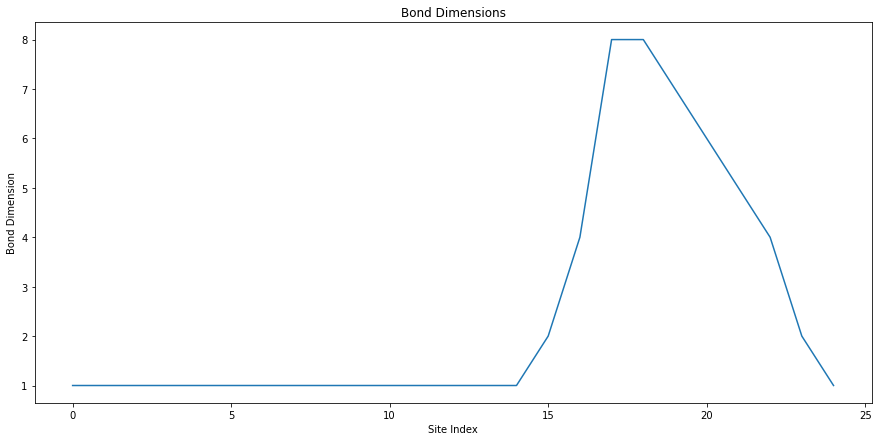

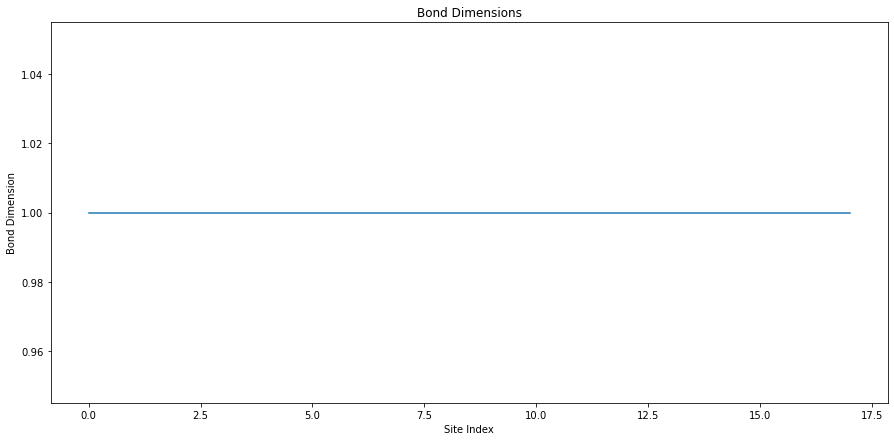

In [6]:
#plot length of schmidt values accross sites
circmps_mpo.plot_bond_dims()
#measurement_mps.into_canonical_form(up_down='up')
measurement_mps.plot_bond_dims()

In [7]:
x=2
N=85
xi=2**13
print("N",N)
print("x",x)
n_samples = 1000
len_a = 2*int(np.ceil(np.log2(N)))+3
cx_mpos = gts.cx_pow_2k_mod_N_mpo_from_fatU(N,x,len_a,xi)

#mps,len_a,tim_before_fourier = get_shor_mpo(N,x,xi,cx_mpos)
mps , len_a, tim_before_fourier = get_shor_fat(N,x,xi)

schmidt_values_mpo = cx_mpos[0].get_schmidt_values_all_sites()

schmidt_values_before_fourier = mps.get_schmidt_values_all_sites()
print(mps.maximum_bond_dim(),"Maximum bond dimension before fourier and before measurement")
entanglement_entropy_before_fourier = mps.get_entanglement_all_sites()

circmps = mps
mpomps = copy.deepcopy(circmps)

tim_measurement = tim.Tim()
measurement_mps = circmps.collapse_U()

print(measurement_mps.maximum_bond_dim(),"Maximum bond dimension after collapse U")
schmidt_values_measurement_before_fourier = measurement_mps.get_schmidt_values_all_sites()
entanglement_entropy_measurement_before_fourier = measurement_mps.get_entanglement_all_sites()
tim_measurement.print_since_last("collapse U")

N 85
x 2
cx_gate (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2)
MPSU created in 0.0003638267517089844
Hadamards applied in 0.0012128353118896484
Control U gates created in 0.007965803146362305
Control U 0 gate applied in 0.0014178752899169922
SWAP gates applied in 0.005649566650390625
Control U 1 gate applied in 0.0009560585021972656
SWAP gates applied in 0.005211830139160156
Control U 2 gate applied in 0.0009398460388183594
SWAP gates applied in 0.0048639774322509766
Control U 3 gate applied in 0.0016484260559082031
SWAP gates applied in 0.00455927848815918
Control U 4 gate applied in 0.0009586811065673828
SWAP gates applied in 0.004289388656616211
Control U 5 gate applied in 0.0009477138519287109
SWAP gates applied in 0.003875255584716797
Control U 6 gate applied in 0.0009617805480957031
SWAP gates applied in 0.003620624542236328
Control U 7 gate applied in 0.0009427070617675781
SWAP gates applied in 0.0032660961151123047
Control U 8 gate applied in 0.0009455680847167969
SWAP gates

0.0073091983795166016